# First clustering with Scikit-Learn

## Setup

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
RANDOM_SEED = 42
CMAP = sns.diverging_palette(230, 20, n=24)

## Data Processing

In [3]:
x, y = make_blobs(
    n_samples=100,
    centers=6,
    n_features=2,
    cluster_std=[0.3, 2, 1.5, 1, 1.2, 0.8],
    random_state=RANDOM_SEED,
)

In [4]:
df_blobs = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1], "y": y})
df_blobs.head()

,x1,x2,y
0,-8.251471,9.513979,3
1,-9.577909,10.561024,5
2,-2.648223,8.874567,0
3,-10.690446,8.647937,5
4,-8.738676,6.820047,3


<Axes: xlabel='x1', ylabel='x2'>

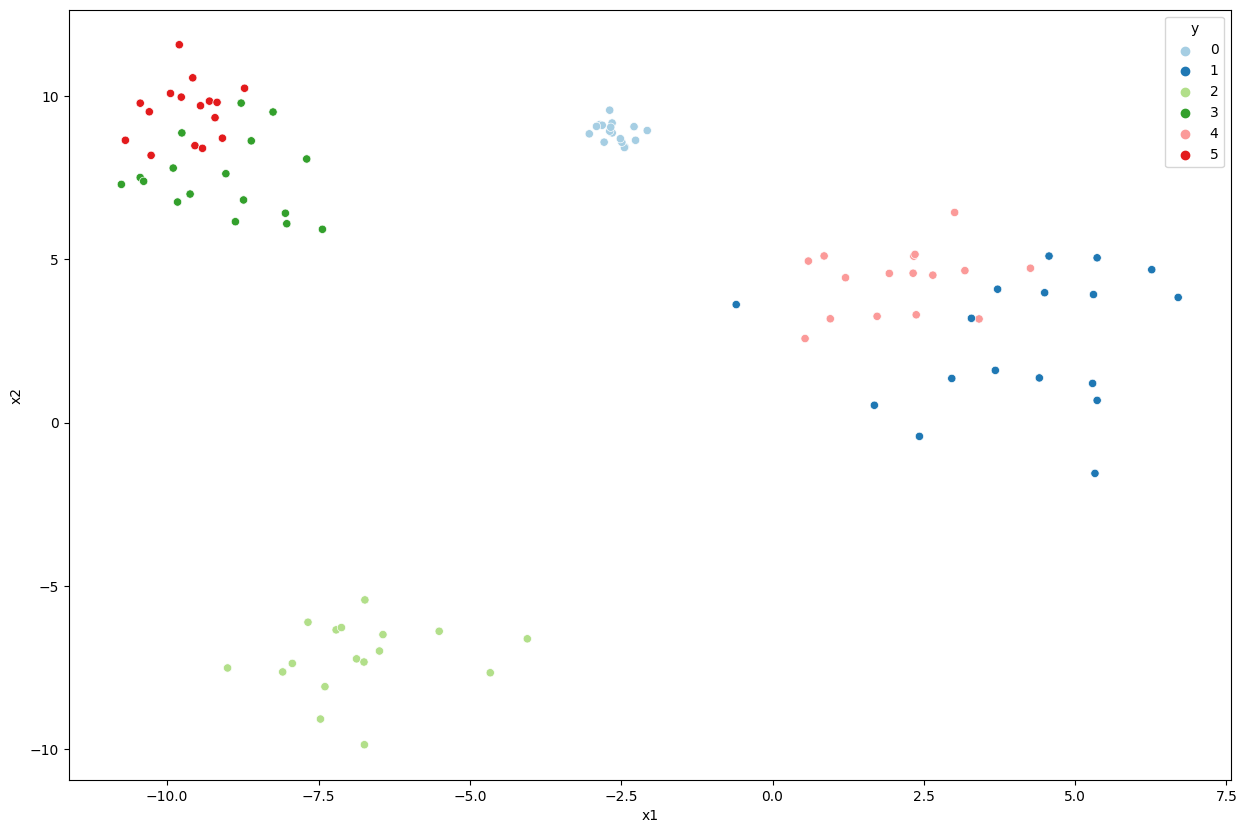

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x, y = df_blobs[["x1", "x2"]], df_blobs["y"]
sns.scatterplot(x=x["x1"], y=x["x2"], hue=y, ax=ax, palette="Paired")


In [6]:
kmeans = KMeans(n_clusters=6, random_state=RANDOM_SEED)
y_preds = kmeans.fit_predict(X=x)

In [7]:
y_preds

array([3, 3, 0, 3, 4, 1, 2, 2, 2, 0, 0, 1, 4, 2, 2, 5, 3, 3, 1, 2, 5, 1,
       0, 4, 5, 2, 3, 5, 3, 2, 1, 3, 5, 3, 5, 5, 0, 0, 0, 2, 1, 1, 2, 2,
       5, 0, 2, 4, 5, 3, 3, 1, 1, 1, 2, 5, 5, 3, 0, 0, 1, 0, 3, 1, 4, 3,
       3, 3, 4, 3, 5, 1, 4, 1, 3, 5, 2, 4, 5, 4, 3, 1, 4, 2, 4, 0, 5, 0,
       0, 0, 4, 2, 1, 1, 4, 0, 4, 0, 2, 2], dtype=int32)

Text(0.5, 1.0, 'Predicted Clusters')

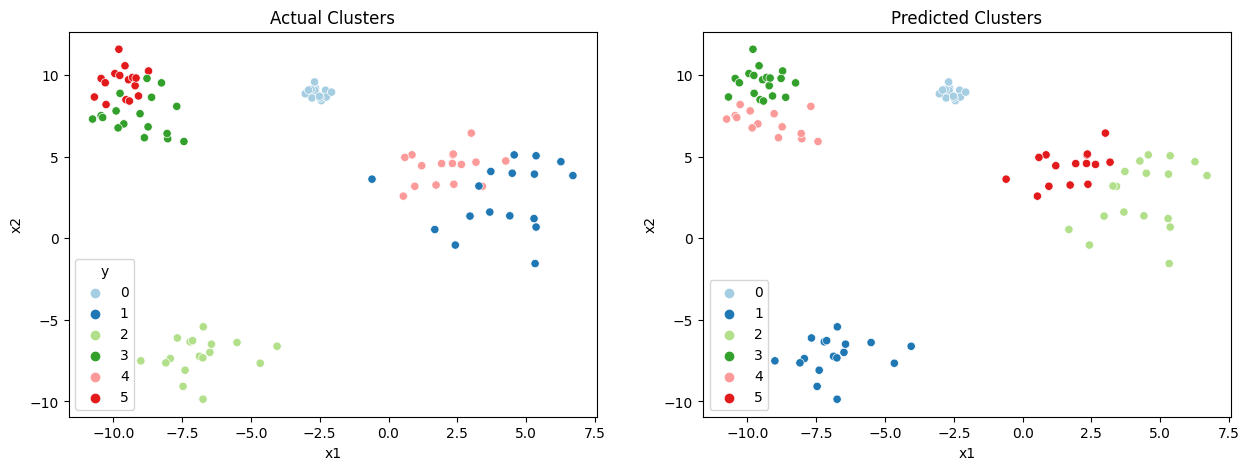

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=x["x1"], y=x["x2"], hue=y, ax=ax[0], palette="Paired")
sns.scatterplot(x=x["x1"], y=x["x2"], hue=y_preds, ax=ax[1], palette="Paired")

ax[0].set_title("Actual Clusters")
ax[1].set_title("Predicted Clusters")